# Tarea - Caminata aleatoria

Terezza Marianne Gonzalez Jauregui

17/octubre/2024

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

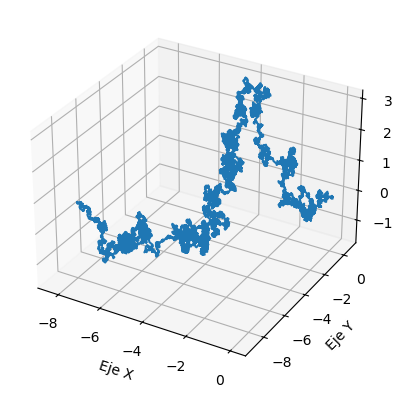

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

inter=[-1,1]
Dt=0.001
t=10
paso=int(t/Dt)

W_x = np.zeros(steps)
W_y = np.zeros(steps)
W_z = np.zeros(steps)

for i in range(1, paso):
    X_i = np.random.choice(inter)  # Elección aleatoria entre -1 y 1
    W_x[i] = W_x[i-1] + X_i * np.sqrt(Dt)
    
    X_i = np.random.choice(inter)
    W_y[i] = W_y[i-1] + X_i * np.sqrt(Dt)
    
    X_i = np.random.choice(inter)
    W_z[i] = W_z[i-1] + X_i * np.sqrt(Dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #Esto para hacer gráficas en 3d
ax.plot(W_x, W_y, W_z)
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

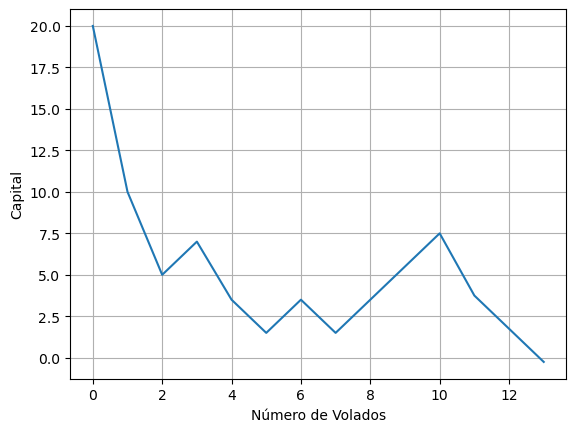

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random

def apostar(capital_inicial):
    capital = capital_inicial
    capital_hist = [capital] 

    while capital > 0:
        volado = np.random.choice([-1, 1])  # -1 es perder, 1 es ganar
        if capital >= 6:
            apuesta = capital / 2
        else:
            apuesta = 2
        capital = capital + volado * apuesta
        capital_hist.append(capital)
    return capital_hist

# 1. Gráfica
capital_inicial = 20
nueva_capital = apostar(capital_inicial)

plt.figure()
plt.plot(nueva_capital)
plt.xlabel("Número de Volados")
plt.ylabel("Capital")
plt.grid()
plt.show()

In [54]:
# 2. Montecarlo
n= 10000
tiempo_quiebra = []

for _ in range(n):
    nueva_capital = apostar(capital_inicial)
    tiempo_quiebra.append(len(nueva_capital) - 1)

promedio = np.mean(tiempo_quiebra)
promedio

26.3526

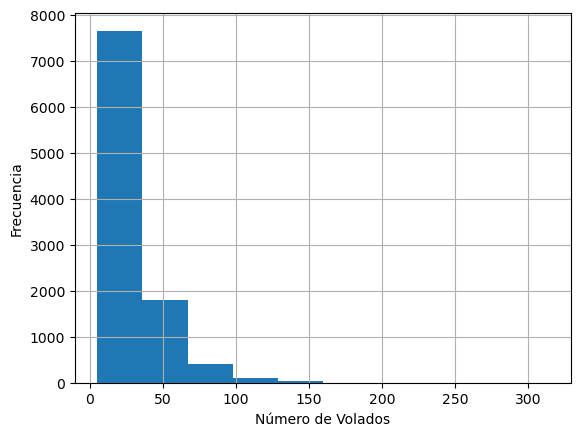

In [46]:
# 3. Histograma
plt.figure()
plt.hist(tiempo_quiebra) #Esto lo investigue
plt.xlabel("Número de Volados")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()